# Spectral analysis using QGSP

This example demonstrates how to build a quaternion graph signal, a quaternion-weighted graph and how to perform a spectral analysis of such signal.

In [1]:
# If gspx is not installed, we add it to the path
import os, sys
gdir = os.path.dirname(os.getcwd())  # parent folder
sys.path.insert(0, gdir)

In [2]:
import numpy as np

from gspx.utils.display import plot_graph, plot_quaternion_graph_signal
from gspx.datasets import WeatherGraphData
from gspx.signals import QuaternionSignal
from gspx.qgsp import create_quaternion_weights, QGFT, QMatrix

## Quaternion-weighted graph

In [3]:
data = WeatherGraphData(n_neighbors=9)
Ar, coords = data.graph
s = data.signal

In [13]:
df = data.data

Aq = create_quaternion_weights(
    Ar, df, icols=['humidity'],
    jcols=['temp'],
    kcols=['wind_speed'], gauss_den=3.5,
    hermitian=False)

100%|██████████| 1440/1440 [00:06<00:00, 214.47it/s]


Please wait while the dense quaternion matrix is assembled.


In [14]:
data.describe_graph()

n_nodes: 145
n_edges: 720
n_self_loops: 0
density: 0.06896551724137931
is_connected: True
n_connected_components: 1
is_directed: False
is_weighted: True


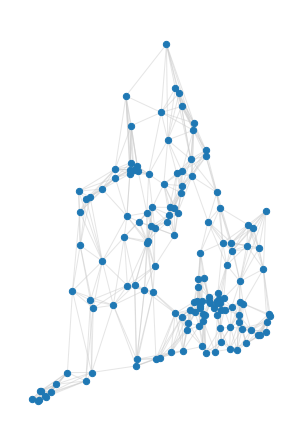

In [15]:
import matplotlib.pyplot as plt

plot_graph(
    Ar, coords, figsize=(4, 6), node_size=40,
    edge_color=(0.8, 0.8, 0.8, 0.5)
)
fig = plt.gcf()
fig.savefig('../../phd-thesis/thesis/Figures/uk_qgsp_graph.pdf', dpi=300)

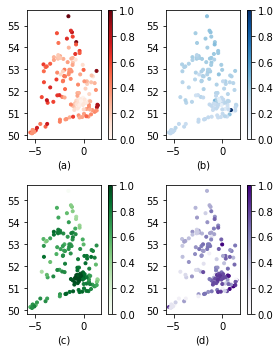

In [16]:
fig = plot_quaternion_graph_signal(s, coords, figsize=(4, 5))
fig.savefig('../../phd-thesis/thesis/Figures/uk_qgsp_sig.pdf', dpi=300)

In [17]:
qgft = QGFT(norm=1)
qgft.fit(Aq)

Running eigendecomposition of the shift operator.
Sorting the frequencies based on Total Variation.


Normalizing each eigenvector by its L1-norm.: 100%|██████████| 145/145 [00:00<00:00, 355.01it/s]


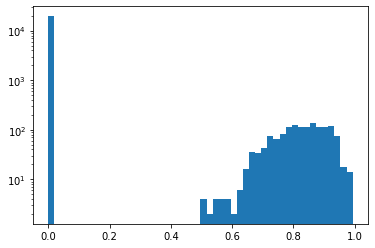

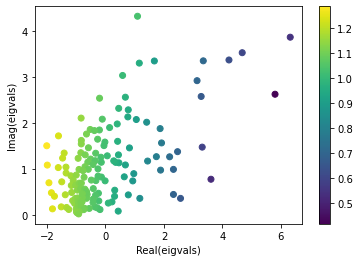

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.hist(Aq.abs().ravel(), bins=50)
plt.yscale('log')
fig = plt.gcf()
plt.savefig('../../phd-thesis/thesis/Figures/edge_weight_distribution_theta0p1.pdf', dpi=300)

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
plt.scatter(np.real(qgft.eigc), np.imag(qgft.eigc), c=qgft.tv_)
plt.colorbar()
# plt.title("Total Variation of eigenvectors for each eigenvalue")
plt.xlabel("Real(eigvals)")
plt.ylabel("Imag(eigvals)")
plt.savefig('../../phd-thesis/thesis/Figures/uk_qgsp_tv1_theta0p1.pdf', dpi=300)
plt.show()

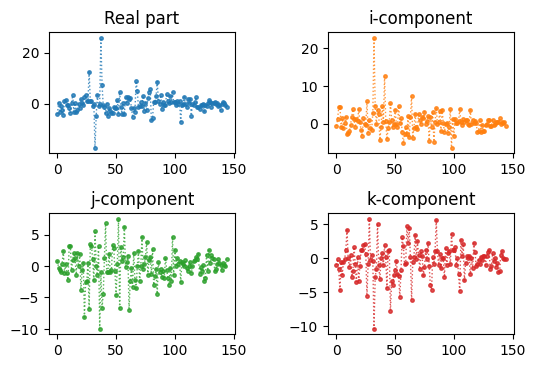

In [19]:
ss = qgft.transform(s)
fig = QuaternionSignal.show(ss, ordering=qgft.idx_freq)
fig.savefig('../../phd-thesis/thesis/Figures/uk_qgsp_spectrumsig_norm1_theta0p1.pdf', dpi=300)

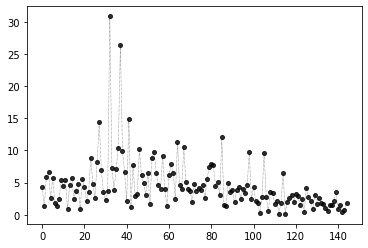

In [20]:
params = dict(
    marker='.', markersize=8,
    alpha=0.8, linestyle='dotted',
    linewidth=0.5
)
fig = plt.figure()
plt.plot(ss.abs().ravel()[qgft.idx_freq], color='k', **params)
fig.savefig('../../phd-thesis/thesis/Figures/uk_ss1_abs_theta0p1.pdf', dpi=300)

## What if norm-l2 is used in total variation for frequency ordering?

Running eigendecomposition of the shift operator.
Sorting the frequencies based on Total Variation.


Normalizing each eigenvector by its L2-norm.: 100%|██████████| 145/145 [00:02<00:00, 70.32it/s]


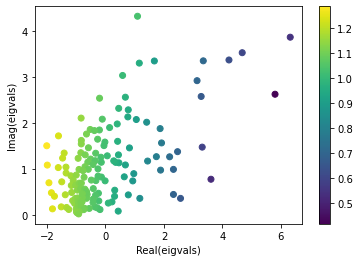

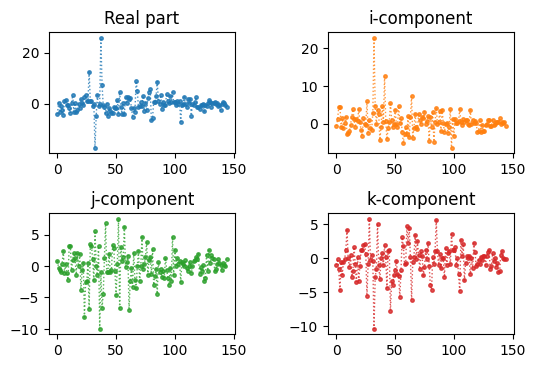

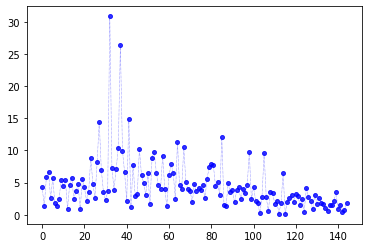

In [21]:
qgft2 = QGFT(norm=2)
qgft2.fit(Aq)

plt.scatter(np.real(qgft2.eigc), np.imag(qgft2.eigc), c=qgft2.tv_)
plt.colorbar()
# plt.title("Total Variation of eigenvectors for each eigenvalue")
plt.xlabel("Real(eigvals)")
plt.ylabel("Imag(eigvals)")
plt.savefig('../../phd-thesis/thesis/Figures/uk_qgsp_tv2.pdf', dpi=300)
plt.show()

ss2 = qgft2.transform(s)
fig = QuaternionSignal.show(ss2, ordering=qgft2.idx_freq)
fig.savefig('../../phd-thesis/thesis/Figures/uk_qgsp_spectrumsig_norm2.pdf', dpi=300)

params = dict(
    marker='.', markersize=8,
    alpha=0.8, linestyle='dotted',
    linewidth=0.5
)
fig = plt.figure()
plt.plot(ss2.abs().ravel()[qgft2.idx_freq], color='b', **params)
fig.savefig('../../phd-thesis/thesis/Figures/uk_ss2_abs.pdf', dpi=300)